<a href="https://colab.research.google.com/github/kaitlynchan/splash_2022/blob/main/Splash_2020_Neurotech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Splash 2022: Signal Processing!

## Sound is a Signal: Time or Frequency?

Package Installation (Feel free to ignore!)

In [ ]:
!sudo apt-get install libportaudio2
!pip install sounddevice

In [ ]:
# Click on me and hit Shift + Enter!
import numpy as np
import matplotlib.pyplot as plt
import time
import sounddevice as sd
import IPython.display as ipd
%matplotlib inline

## Time Representation: Sinusoid
- ### g(t) = A sin(2$\pi$ft) where A is the loudness (or amplitude), t is the time step, and f is the frequency
- ### How many cycles do you count? Which variable does that number depend on?

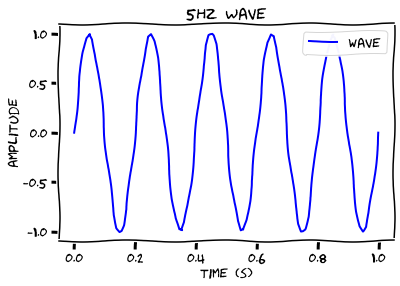

In [9]:
frequency = 5 #Feel free to modify! The frequency is in Hz.
time = np.linspace(0, 1, 100) #100 time points from 0 to 1
wave = np.sin(2*np.pi*frequency*time)
with plt.xkcd():
    plt.figure()
    plt.plot(time, wave, 'b')
    plt.xlabel("time (s)")
    plt.ylabel("amplitude")
    plt.title("{0}Hz Wave".format(frequency))
    plt.legend(['wave'],loc='upper right')
    plt.show()

In [10]:
# For Middle C octave, we list some frequencies in Hz that correspond to the notes. 

note_freqs = {"A": 220, "A#": 233, "B": 247, "C": 262, "C#": 277, "D": 294, \
              "D#": 311, "E": 330, "F": 349, "F#": 370, "G": 392, "G#": 415}

In [11]:
# How can we generate a sinusoid given a specific note's frequency?

def pure_tone_gen(note, fs, duration, amplitude=1, phase=0, octave_offset=0):
    """
    Generate a NumPy array which contains samples (spaced apart by 1 / fs) of a sine wave representing the note
    "note" for duration seconds with amplitude and phase as given. If the note is outside the middle C octave,
    then octave_offset specifies how many octaves above or below it should be.
    
    Parameters:
    note          - The note to generate. Some element of note_freqs (e.g., "A", "A#", "B", and so on).
    fs            - The sampling frequency, that is, the number of samples to use per second of data generated.
    duration      - The length, in seconds, of the pure tone to generate.
    amplitude     - The amplitude of the note.
    phase         - The phase of the note.
    octave_offset - How many octaves below or above the octave {A, A#, ..., Middle C, ..., G, G#} the desired 
                    note is. For example, setting this parameter to zero and note to "C" would generate Middle C.
    """
    f = note_freqs[note]*np.exp2(octave_offset)
    time = np.linspace(0, duration, fs*duration)
    note = amplitude*np.sin(2*np.pi*f*time)+phase
    return note

In [12]:
fs = 44100 # Sampling frequency is often 44.1kHz for audio due to CD formats
for note in sorted(note_freqs.keys()):
    print("Playing {0} ({1} Hz)".format(note, round(note_freqs[note], 2)))
    sd.play(pure_tone_gen(note, fs, 1), fs)
    sd.wait()
sd.stop()

Playing A (220 Hz)


PortAudioError: ignored

In [13]:
# Time to play multiple notes at once >:D

def chord_gen(notes, fs, duration, amplitudes, phases, octave_offsets):
    """
    Create a chord by superimposing multiple notes.
    
    Parameters:
    notes          - The list of notes to play.
    fs             - A single number for the sampling rate to use for all notes.
    duration       - A single number for the duration of the chord to use.
    amplitudes     - A list of the amplitudes to use.
    phases         - A list of the phases to use.
    octave_offsets - A list of the octave offsets to use.
    
    Hint: Allocate a fixed length NumPy array of all zeros, and create each note one by one
    using pure_tone_gen, adding them to the array to create the chord, which performs the
    superposition. Calling chord_gen and pure_tone_gen should generate NumPy array outputs 
    of the same length whenever the same fs and same duration is passed into both.
    """
    chord = np.zeros(int(fs*duration))
    for idx, note in enumerate(notes):
        chord += pure_tone_gen(note, fs, duration, amplitudes[idx], phases[idx], octave_offsets[idx])
    return chord

In [14]:
# Let's play a chord

sd.play(pure_tone_gen("C", fs, 1), fs)
sd.wait()
sd.play(pure_tone_gen("E", fs, 1), fs)
sd.wait()
sd.play(pure_tone_gen("G", fs, 1), fs)
sd.wait()
sd.play(chord_gen(["C", "E", "G"], fs, 1, [0.5, 1, 1], [0, 0, 0], [0, 0, 0]), fs)

# Feel free to try more chords here! Remember look at the function signature to figure out what inputs you need. 
# sd.play(chord_gen(["C", "F", "A"], fs, .5, [1, 1.5, 1.5], [0, 0, 0], [0, 0, 1]), fs)

PortAudioError: ignored

### What does the chord look like in the time domain?

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


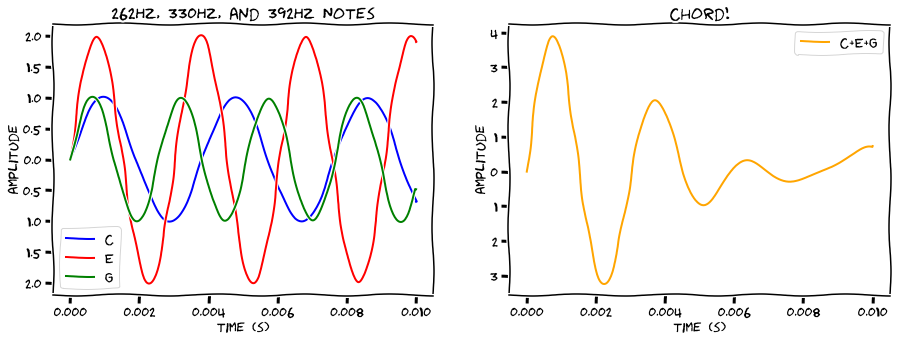

In [17]:
# The frequencies we chose above
f_1 = note_freqs["C"]
f_2 = note_freqs["E"]
f_3 = note_freqs["G"]
duration = 0.01
time = np.linspace(0, duration, int(fs*duration))
note_1 = np.sin(2*np.pi*f_1*time)
note_2 = 2* np.sin(2*np.pi*f_2*time) # Note the amplitude is 2!
note_3 = np.sin(2*np.pi*f_3*time)

# Note we generate the chord by adding (or superimposing!) the notes into one signal
chord_superimpose = note_1+note_2+note_3

with plt.xkcd():
    f, (ax1, ax2) = plt.subplots(1, 2)
    f.set_figheight(5)
    f.set_figwidth(15)
    ax1.plot(time, note_1, 'b')
    ax1.plot(time, note_2, 'r')
    ax1.plot(time, note_3, 'g')
    ax1.set_xlabel("time (s)")
    ax1.set_ylabel("amplitude")
    ax1.set_title("{0}Hz, {1}Hz, and {2}Hz Notes".format(f_1, f_2, f_3))
    ax1.legend(["C","E", "G"])
    ax2.plot(time, chord_superimpose, 'orange')
    ax2.set_xlabel("time (s)")
    ax2.set_ylabel("amplitude")
    ax2.set_title("Chord!")
    ax2.legend(["C+E+G"])

### Given the plot of the chord above, can you squint and figure out which notes/frequencies are in it?
#### I can't :( but the Fourier Transform can! :D

## Fourier Transform: Moving from Time -> Frequency

- ### Continuous Time Fourier Transform (CTFT): G(f) = $\int\limits_{-\infty}^{\infty}g(t) e^{-(2 \pi ift)}dt$
- g(t): time signal (i.e. the chord) that we want to decompose into frequency components (notes)
- $e^{-(2 \pi ft)}$ : function that loops around the unit circle at frequency f
- $\int\limits_{-\infty}^{\infty}$: integrate and sweep across the time signal, to pick out the component frequencies
- G(f): the frequency representation of our chord

### We will use a variation of the CTFT called the DFT (Discrete Fourier Transform), which allows us to perform the Fourier Transform on discrete time signals and get back a discrete signal in frequency.
- Don't worry if this is confusing! The main idea is that we want to move our chord signal from a time to frequency representation.
- ### Discrete Fourier Transform (DFT): G[k] = $\sum\limits_{n = 0}^{N-1}g[n] e^{-(i\frac{2 \pi} {N} nk)}$
- This looks pretty similar to our CTFT formula! We've just discretized things.

In [18]:
# Some slow code that performs the DFT

def dft(x):
    N = len(x)
    X = np.zeros(N, dtype=np.complex128)
    for k in range(N):
        for n in range(N):
            X[k] = X[k] + (x[n] * np.exp(-1*1j*2*np.pi*k*n*(1/N)))
    return X

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


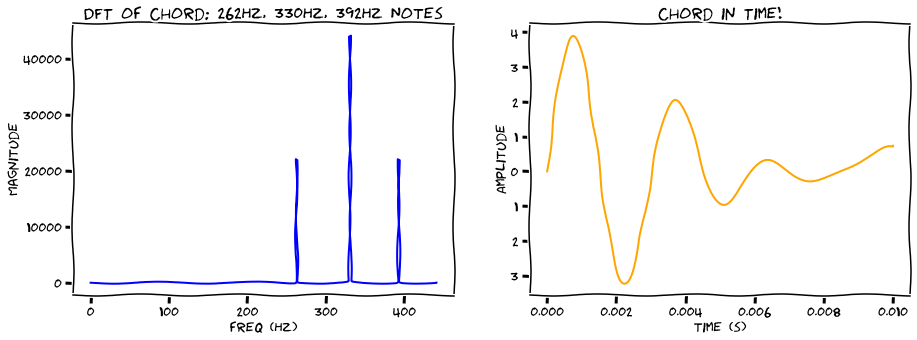

In [19]:
# Finally, let's Fourier Transform our chord.

duration = 1 #Time duration of the chord signal.
t = np.linspace(0, duration, fs*duration)
chord = chord_gen(["C", "E", "G"], fs, duration, [1, 2, 1], [0, 0, 0], [0, 0, 0]) # Generate the chord from the notes C, E, G
N = len(chord) // 100 # Look at the relevant chunk of our transform
ft = np.fft.fft(chord) # Our DFT code, is slow, so let's use a fast variation called the FFT (fast fourier transform)
freq = np.linspace(0, N, N)

with plt.xkcd():
    f, (ax1, ax2) = plt.subplots(1, 2)
    f.set_figheight(5)
    f.set_figwidth(15)
    ax1.plot(freq, np.abs(ft)[0:N], 'b') #Plot the magnitude of the Fourier Transform
    ax1.set_xlabel("freq (Hz)")
    ax1.set_ylabel("Magnitude")
    ax1.set_title("DFT of Chord: {0}Hz, {1}Hz, {2}Hz Notes".format(f_1, f_2, f_3))
    ax2.plot(time, chord_superimpose, 'orange') # Same plot as above
    ax2.set_xlabel("time (s)")
    ax2.set_ylabel("Amplitude")
    ax2.set_title("Chord in Time!")

### The fourier transform has moved our chord from a time representation to frequency!

- #### Does anyone see why the 330Hz signal has a larger magnitude?

## Filtering Out Noise
### Noise = unwanted signals/artifacts that fuzzy up our desired signal :(
- #### EEG Signals: Noise can come from the patient (e.g. muscle movement) or the measurement equipment (60Hz power line)

## Let's look at our original sinusoid:

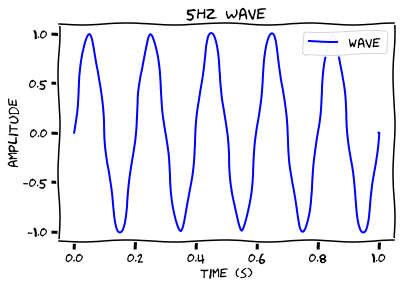

In [20]:
frequency = 5 #Feel free to modify! The frequency is in Hz.
time = np.linspace(0, 1, 1000) #100 time points from 0 to 1
wave = np.sin(2*np.pi*frequency*time)
with plt.xkcd():
    plt.figure()
    plt.plot(time, wave, 'b')
    plt.xlabel("time (s)")
    plt.ylabel("amplitude")
    plt.title("{0}Hz Wave".format(frequency))
    plt.legend(['wave'],loc='upper right')
    plt.show()

## Now generate some random noise and add it to our signal:

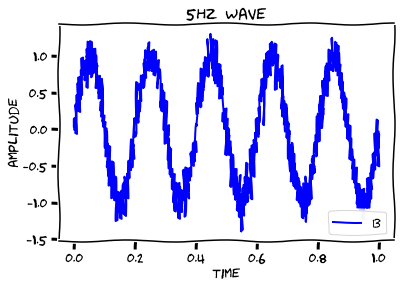

In [21]:
noise = np.random.normal(0, .15, len(wave)) # len(wave) samples of mean=0, stddev=5 gaussian noise
noisy_note = wave+noise
with plt.xkcd():
    plt.figure()
    plt.plot(time, noisy_note, 'b')
    plt.xlabel("time")
    plt.ylabel("amplitude")
    plt.title("{0}Hz Wave".format(frequency))
    plt.legend(("blue"))
    plt.show()

## How can we get rid of this noise and smooth our signal back out?

- Averaging?

In [23]:
# Simple Moving Average (SMA) filter: average of L points before and including current point
filt_sizes = [2, 5, 10, 20, 50]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


<StemContainer object of 3 artists>

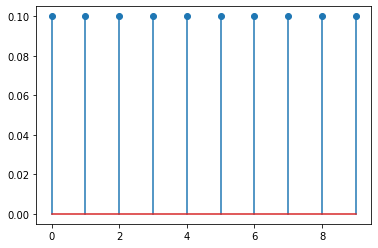

In [24]:
# What does a SMA look like?
length = 10
h = np.ones(length)*(1/length)
plt.stem(h)

## We can apply this averaging filter by _convolving_ the filter h with our noisy signal
- ### Think of convolution as an operation that blurs two functions together. 
- #### Visual explanation on slide 9: https://inst.eecs.berkeley.edu/~ee16b/fa18/lectures/Lecture12A.pdf 

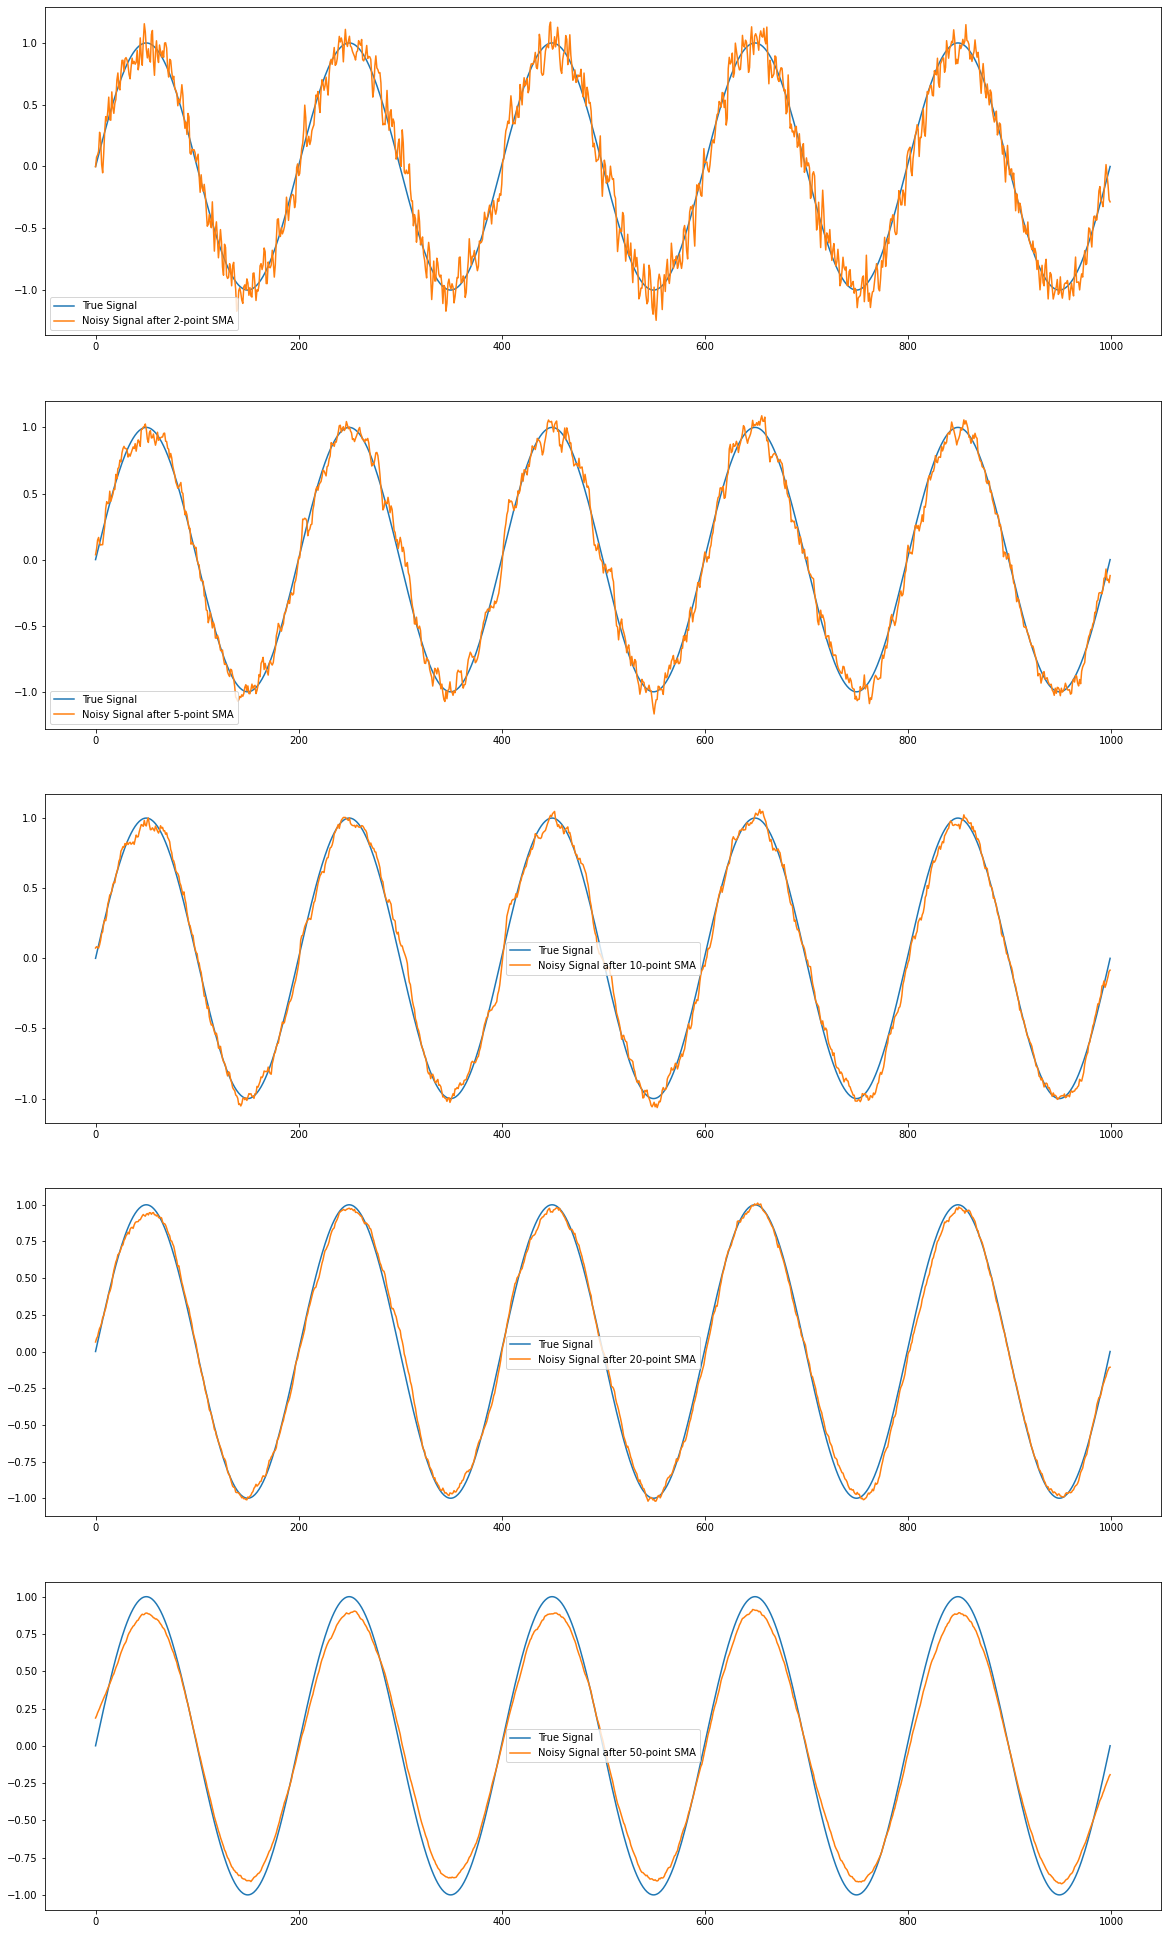

In [25]:
plt.figure(figsize=(20, 35))
i = 1
for s in filt_sizes:
    h = np.ones(s)*(1/s)
    x_hat = np.convolve(noisy_note,h,'same') #Convolve! x_hat's length is the max of noisy_note and h's lengths
    plt.subplot(len(filt_sizes), 1, i)
    plt.plot(wave) #original pure signal
    plt.plot(x_hat) #noisy signal with filter applied
    plt.legend(("True Signal", "Noisy Signal after {}-point SMA".format(s)))
    i = i + 1
plt.show()

## Yay! We've somewhat cleaned up the noise and have something closer to the true signal.

## Extra: Frequency Representation of Time Domain Moving Average Filter


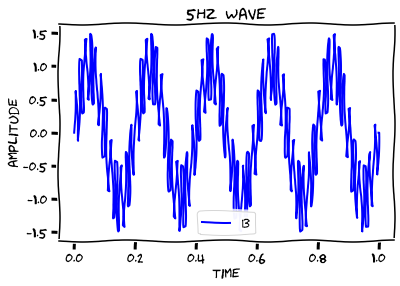

In [26]:
# Let's add the 60Hz noise to our original signal
time = np.linspace(0, 1, 1000)
noisy_note_2 = wave + 0.5* np.sin(2*np.pi*60*time)
with plt.xkcd():
    plt.figure()
    plt.plot(time, noisy_note_2, 'b')
    plt.xlabel("time")
    plt.ylabel("amplitude")
    plt.title("{0}Hz Wave".format(frequency))
    plt.legend(("blue"))
    plt.show()

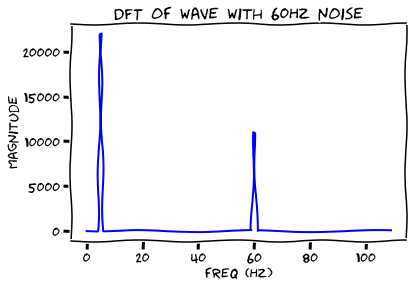

In [27]:
# Let's look at the DFT of noisy_note_2
duration = 1
t = np.linspace(0, duration, fs*duration)
noisy_note_2 = np.sin(2*np.pi*5*t) + 0.5*np.sin(2*np.pi*60*t)
N = len(noisy_note_2) // 400
ft = np.fft.fft(noisy_note_2)
freq = np.linspace(0, N, N)
with plt.xkcd():
    plt.figure()
    plt.plot(np.abs(ft)[0:N], 'b')
    plt.xlabel("freq (Hz)")
    plt.ylabel("Magnitude")
    plt.title("DFT of wave with 60Hz noise")
    plt.show()

## Can we filter out the 60Hz noise in the frequency domain? Yes, with a low pass filter.

### - The frequency response of the SMA is: $H(f) = {\frac{1} {L}} {\frac{sin(\pi f L)} {sin(\pi f)}}$



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()


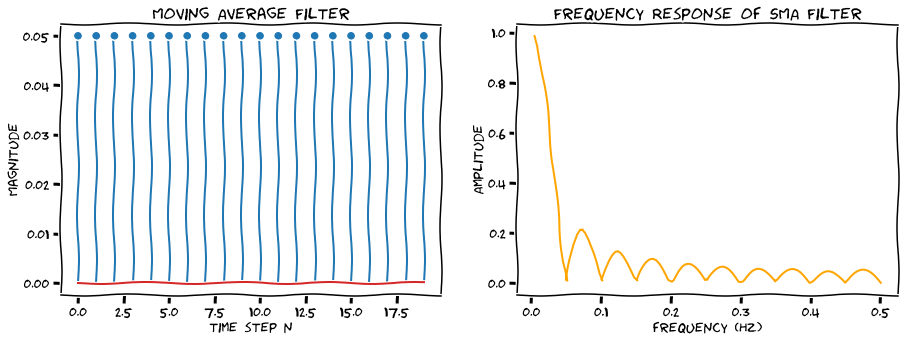

In [28]:
length = 20
h = np.ones(length)*(1/length)

freq = np.linspace(0,0.5,N)
H = (1/length)*np.sin(np.pi*freq*length)/np.sin(np.pi*freq)

with plt.xkcd():
    f, (ax1, ax2) = plt.subplots(1, 2)
    f.set_figheight(5)
    f.set_figwidth(15)
    ax1.stem(h) #Plot the magnitude of the Fourier Transform
    ax1.set_xlabel("time step n")
    ax1.set_ylabel("Magnitude")
    ax1.set_title("Moving Average Filter")
    ax2.plot(freq, abs(H), 'orange') # Same plot as above
    ax2.set_xlabel("frequency (Hz)")
    ax2.set_ylabel("Amplitude")
    ax2.set_title("Frequency Response of SMA Filter")

### Note how even though the SMA filter is great at smoothing signals in time, it isn't great as a low pass filter -> there are definitely bands of frequency that can still pass through.


## Credits
- ### EE120 Labs: https://github.com/dominiccarrano/ee-120-labs